In [95]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [96]:
m_titles = ["user_id","item_id","rating","timestamp"]
df = pd.read_csv("movie_dataset/u.data", sep="\t",names=m_titles)
df_c = df
df.head(n=1)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949


In [97]:
df1 = pd.read_csv("movie_dataset/u.item", sep="\|",encoding="ISO-8859-1",header=None)
df1.head(n=1)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df1 = df1[[0,1]]

In [99]:
df1.columns = ["item_id","title"]
df1.head(n=1)

,item_id,title
0,1,Toy Story (1995)


In [100]:
df1.shape

(1682, 2)

In [101]:
df = pd.merge(df,df1,on="item_id")

In [102]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")

In [104]:
pd.DataFrame(df.groupby("title").mean()["rating"].sort_values(ascending = False).head(n=2))


,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0


In [105]:
pd.DataFrame(df.groupby("title").count()["rating"].head(n=2))

,rating
title,
'Til There Was You (1997),9
1-900 (1994),5


In [106]:
rating = pd.DataFrame(df.groupby("title").mean()["rating"])

In [107]:
rating["num of rating"] = pd.DataFrame(df.groupby("title").count()["rating"])

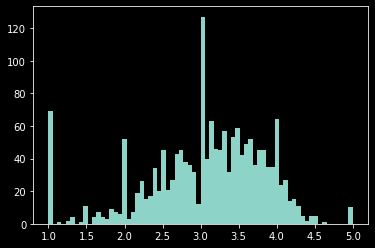

In [108]:
plt.hist(rating["rating"],bins=70)
plt.show()

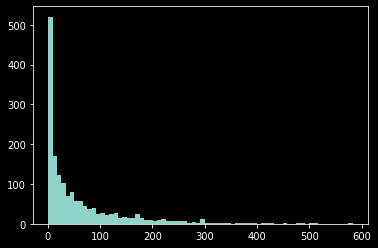

In [109]:
plt.hist(rating["num of rating"],bins=70)
plt.show()

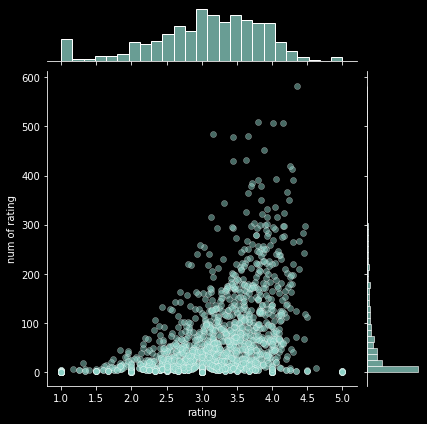

In [110]:
sns.jointplot(x="rating",y="num of rating",data = rating,alpha=0.5)

In [111]:
movie_mat = df.pivot_table(index="user_id",columns="title",values="rating")

In [112]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [134]:
jedi_user_rating = movie_mat["Return of the Jedi (1983)"]

In [137]:
similar_jedi = movie_mat.corrwith(jedi_user_rating)

In [146]:
corr_jedi = pd.DataFrame(similar_jedi,columns=["Correlation"])

In [147]:
corr_jedi.dropna(inplace=True)

In [154]:
# corr_jedi.sort_values("Correlation",ascending=False)
corr_jedi = corr_jedi.join(rating["num of rating"])

In [160]:
corr_jedi[corr_jedi["num of rating"]>100].sort_values("Correlation",ascending=False)

,Correlation,num of rating
title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,367
Star Wars (1977),0.672556,583
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331
...,...,...
Brazil (1985),-0.111670,208
Lost Highway (1997),-0.112456,125
Annie Hall (1977),-0.116004,180


## Recommendation Function

In [170]:
def recommendMovies(name):
    try:
        movie_user_rating = movie_mat[name]
        similar_movie = movie_mat.corrwith(movie_user_rating)
        corr_movie = pd.DataFrame(similar_movie,columns=["Correlation"])
        corr_movie.dropna(inplace=True)
        corr_movie = corr_movie.join(rating["num of rating"])
        result = corr_movie[corr_movie["num of rating"]>100].sort_values("Correlation",ascending=False)
        return result
    except:
        print("Something went wrong!!!")

In [184]:
res = recommendMovies("Star Wars (1977)")